<a href="https://colab.research.google.com/github/pych0413/ImageRecognition_mnist/blob/master/NeuralNetwork_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the data, split between train and validation sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The dataset has 70000 images which are 28x28 pixel.
It is divided into training dataset and testing dataset.
The training dataset has 60000 images and the testing dataset has 10000 images.

In [ ]:
# Preprocess (Categorically and one-hot encoding)
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

Reshape the data and use categorical function to define 10 class for classification.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


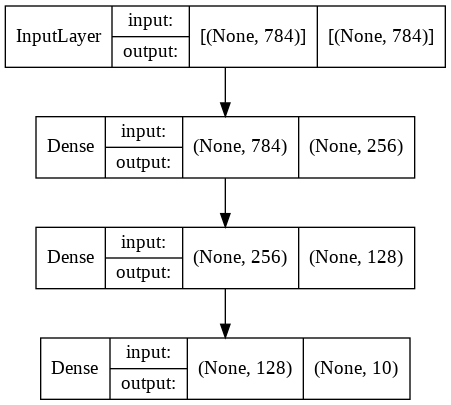

In [ ]:
# Creating the Model 
model = Sequential()

model.add(Dense(units = 256, activation='sigmoid', input_dim=784))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy'])

# Show the model
plot_model(model, show_shapes=True, show_layer_names=False)

This model has 3 fully connected layers.

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train, 
    epochs = 3,
    verbose = 1,
    batch_size = 32,
    validation_data=(X_valid, y_valid)
)

Epoch 1/3
1500/1500 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.8802 - val_loss: 0.0511 - val_accuracy: 0.9160
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0422 - accuracy: 0.9308 - val_loss: 0.0402 - val_accuracy: 0.9322
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0356 - accuracy: 0.9413 - val_loss: 0.0359 - val_accuracy: 0.9407


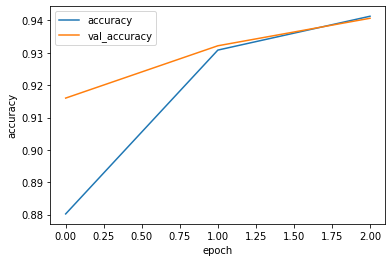

In [ ]:
# Analysis the Accuracy result
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

The validation accuracy is increasing with the epoch is increasing.

In [ ]:
# Test Result
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Loss: {0[0]}\nTesting Accuracy: {0[1]}".format(score))

Testing Loss: 0.03424352407455444
Testing Accuracy: 0.944100022315979


[7 2 1 0 4 1 4 9 4 9]


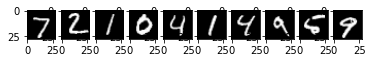

In [ ]:
# Prediction of the model
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

In [ ]:
# Optimize the model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalization
X_train = X_train / 255
X_test = X_test / 255

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

def new_model(drop_rate=0.5, lr=0.1, bs=16, epo=50):
    global model, history
    model = Sequential()
    model.add(Dense(units = 256, activation='sigmoid', input_dim=784))
    model.add(Dense(units = 128, activation='relu'))

    # Dropout
    model.add(Dropout(rate=drop_rate))

    model.add(Dense(units = 10, activation='softmax'))

    model.compile(
    # Change the optimizer and learning rate
    optimizer = optimizers.SGD(learning_rate = lr),
    
    # Optimize the loss Function
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])
    
    # Optimize the batch size and epoch
    history = model.fit(X_train, y_train, verbose=0, batch_size=bs, epochs=epo, validation_data=(X_valid, y_valid))

    score = model.evaluate(X_test, y_test, verbose=0)
    print("\nNew Model:\nDrop rate: {0}\nLearning rate: {1}\nBatch size: {2}\nEpochs: {3}".format(drop_rate, lr, bs, epo))
    print("Testing Loss: {0[0]}\nTesting Accuracy: {0[1]}".format(score))
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="best")
    plt.show()

11501568/11490434 [==============================] - 0s 0us/step



New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 16
Epochs: 50
Testing Loss: 0.09621098637580872
Testing Accuracy: 0.9815999865531921


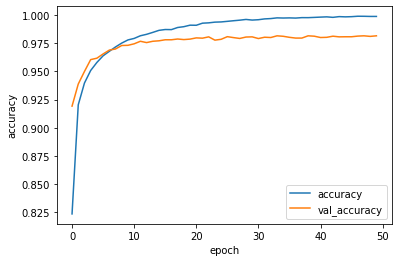


New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 50
Testing Loss: 0.10836080461740494
Testing Accuracy: 0.9800999760627747


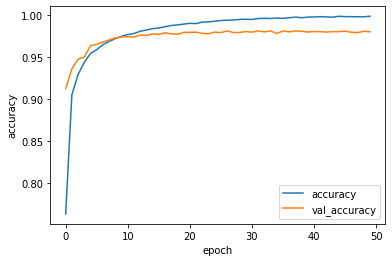


New Model:
Drop rate: 0.7
Learning rate: 0.1
Batch size: 16
Epochs: 50
Testing Loss: 0.1243453398346901
Testing Accuracy: 0.9796000123023987


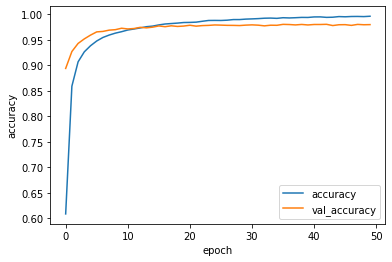

In [ ]:
new_model(drop_rate=0.3, lr=0.1, bs=16, epo=50)
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=50)
new_model(drop_rate=0.7, lr=0.1, bs=16, epo=50)

The accuracy is increasing with the Drop-out rate is decreasing.


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 8
Epochs: 50
Testing Loss: 0.11038282513618469
Testing Accuracy: 0.9810000061988831


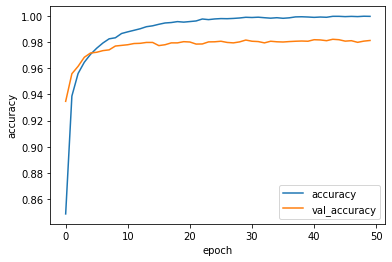


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 16
Epochs: 50
Testing Loss: 0.09448355436325073
Testing Accuracy: 0.9807999730110168


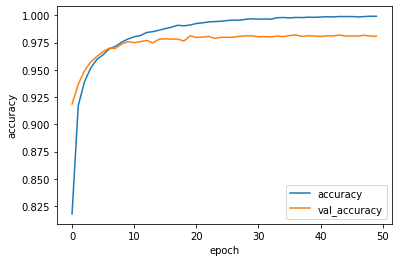


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 32
Epochs: 50
Testing Loss: 0.07286255061626434
Testing Accuracy: 0.9800000190734863


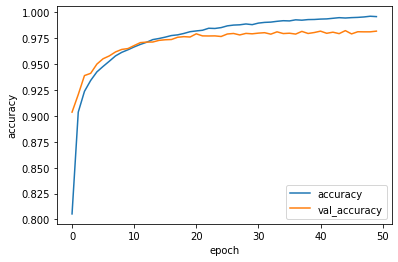


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 64
Epochs: 50
Testing Loss: 0.07031004875898361
Testing Accuracy: 0.9783999919891357


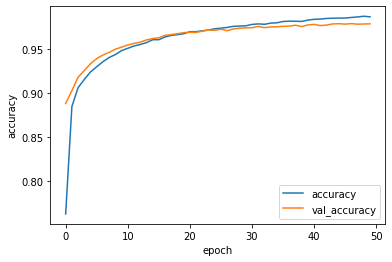

In [ ]:
new_model(drop_rate=0.3, lr=0.1, bs=8, epo=50)
new_model(drop_rate=0.3, lr=0.1, bs=16, epo=50)
new_model(drop_rate=0.3, lr=0.1, bs=32, epo=50)
new_model(drop_rate=0.3, lr=0.1, bs=64, epo=50)

The accuracy is increasing with the batch size is decreasing in 0.1 learning rate.


New Model:
Drop rate: 0.3
Learning rate: 0.05
Batch size: 8
Epochs: 50
Testing Loss: 0.09174039214849472
Testing Accuracy: 0.98089998960495


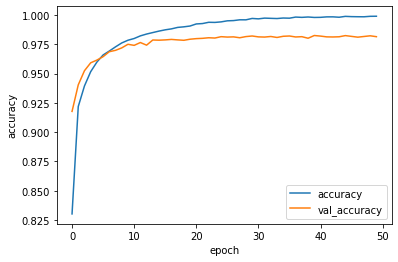


New Model:
Drop rate: 0.3
Learning rate: 0.05
Batch size: 16
Epochs: 50
Testing Loss: 0.07285018265247345
Testing Accuracy: 0.98089998960495


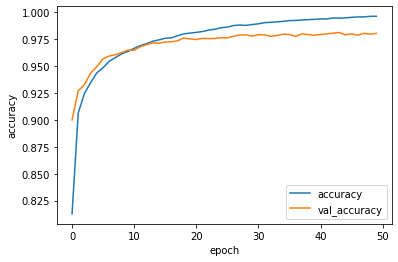


New Model:
Drop rate: 0.3
Learning rate: 0.05
Batch size: 32
Epochs: 50
Testing Loss: 0.06931301951408386
Testing Accuracy: 0.9797000288963318


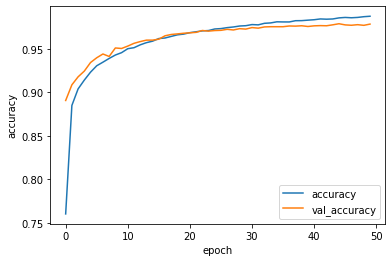


New Model:
Drop rate: 0.3
Learning rate: 0.05
Batch size: 64
Epochs: 50
Testing Loss: 0.0865570530295372
Testing Accuracy: 0.972599983215332


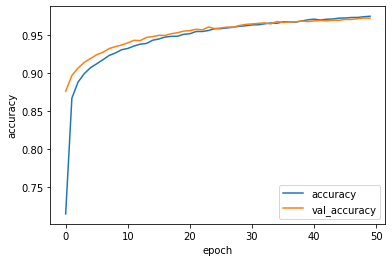

In [ ]:
new_model(drop_rate=0.3, lr=0.05, bs=8, epo=50)
new_model(drop_rate=0.3, lr=0.05, bs=16, epo=50)
new_model(drop_rate=0.3, lr=0.05, bs=32, epo=50)
new_model(drop_rate=0.3, lr=0.05, bs=64, epo=50)

The accuracy is increasing with the batch size is decreasing in 0.05 learning rate.


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 8
Epochs: 50
Testing Loss: 0.11243140697479248
Testing Accuracy: 0.9821000099182129


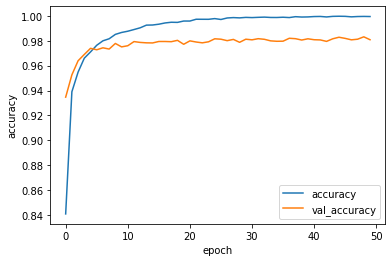

In [ ]:
new_model(drop_rate=0.3, lr=0.1, bs=8, epo=50)

This is the best model with 98.21% testing accuracy.